In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



In [26]:
#use pandas to read csv file
df=pd.read_csv("C:/Users/allie/Downloads/archive/Tesla.csv")

In [27]:
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [28]:
#slice dataframe for Open column
df1=df["Open"]

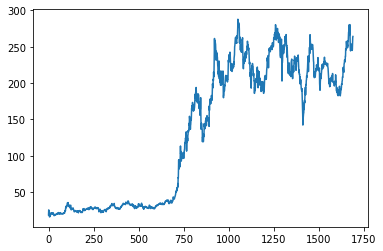

In [29]:
#plot index vs df1
import matplotlib.pyplot as plt
plt.plot(df1)

In [30]:
#model1 is created as an instance of linear regression
from sklearn.linear_model import LinearRegression
model1=LinearRegression()

In [31]:
#set target for prediction and drop unneeded columns from dataframe
target=df["High"]
data=df.drop(["High","Date"], axis=1)

In [32]:
#split dataframe into sets to train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,target)

In [33]:
#fit the model and calculate the optimal slope and y-int
model1.fit(x_train, y_train)

LinearRegression()

In [34]:
#calculate accuracy of model
model1.score(x_test, y_test)

0.9998082607304545

In [35]:
#output data to compare against actual prediction
row1=data.iloc[50:52]
row1

,Open,Low,Close,Volume,Adj Close
50,21.00,20.690001,20.709999,376200,20.709999
51,20.75,19.760000,20.170000,386600,20.170000


In [36]:
#set predictions to variable
ytest_predictions = model1.predict(x_test)

In [39]:
y_test=y_test.to_frame()

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [40]:
y_test

,High
569,29.889999
1464,254.000000
406,31.799999
485,30.290001
445,38.470001
...,...
1344,213.750000
1191,203.789993
382,29.500000
333,28.299999


In [41]:
#Set dependent variable of graph to model predictions
y_test["Predict"] = ytest_predictions

In [43]:
y_test = y_test.sort_index()
#y_test = y_test.rest_index()

y_test

,High,Predict
1,30.420000,28.733591
6,17.520000,18.845071
7,17.900000,18.611556
9,18.639999,18.647586
13,22.250000,22.463245
...,...,...
1683,253.889999,252.942326
1684,250.070007,249.795774
1686,246.500000,247.574610
1689,261.000000,259.554391


In [44]:
y_test

,High,Predict
1,30.420000,28.733591
6,17.520000,18.845071
7,17.900000,18.611556
9,18.639999,18.647586
13,22.250000,22.463245
...,...,...
1683,253.889999,252.942326
1684,250.070007,249.795774
1686,246.500000,247.574610
1689,261.000000,259.554391


<AxesSubplot:>

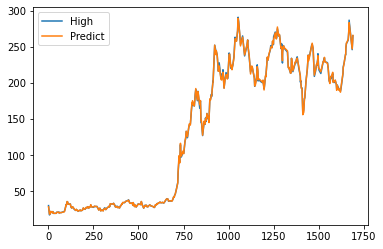

In [45]:
y_test.plot()